# 彩色空间转换

In [1]:
import numpy as np
import cupy as cp
import scipy as sp
import skimage as ski
import skimage.io as skio
import skimage.color as skc
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
src1 = skio.imread('../../datas/f2.jpg')
src2 = skio.imread('../../datas/f1.jpg')

## 1. RGB图像转换灰度图像

In [5]:
def rgb2gray(src):
    assert len(src.shape) > 2
#     shape = src.shape
    src_gpu = cp.array(src.astype(np.float32))
    dst_gpu = cp.dot(src_gpu[...,:3],cp.array([0.299, 0.587, 0.114]))
    dst = dst_gpu.get()
    dst = np.clip(dst,0,255)
    dst = np.uint8(dst)
    return dst

In [9]:
dst = rgb2gray(src1)

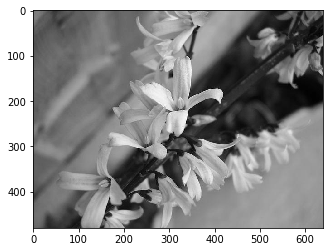

In [10]:
plt.imshow(dst,'gray')

In [11]:
def rgb2gray_avg(src):
    assert len(src.shape) > 2
    src_gpu = cp.array(src.astype(np.float32))
    src_gpu_r = src_gpu[:,:,0]
    src_gpu_g = src_gpu[:,:,1]
    src_gpu_b = src_gpu[:,:,2]
    dst_gpu = (src_gpu_r + src_gpu_g + src_gpu_b) / 3.0
    dst = dst_gpu.get()
    dst = np.clip(dst,0,255)
    dst = np.uint8(dst)
    return dst

In [12]:
dst = rgb2gray_avg(src1)

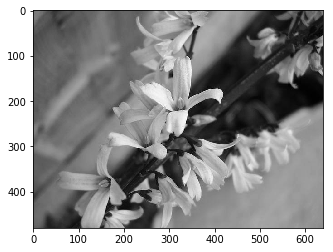

In [13]:
plt.imshow(dst,'gray')

## 2.RGB转换XYZ

In [22]:
def rgb2xyz(src):
    assert len(src.shape) > 2
    src_gpu = cp.array(src.astype(np.int32))
    R_gpu = src_gpu[:,:,0]
    G_gpu = src_gpu[:,:,1]
    B_gpu = src_gpu[:,:,2]
    X = (R_gpu * 199049 + G_gpu * 394494 + B_gpu * 455033 + 524288) >> 20
    Y = (R_gpu * 75675 + G_gpu * 749900 + B_gpu * 223002 + 524288) >> 20
    Z = (R_gpu * 915161 + G_gpu * 114795 + B_gpu * 18621 + 524288) >> 20
    dst_gpu = cp.zeros_like(src_gpu)
    dst_gpu[:,:,0] = X
    dst_gpu[:,:,1] = Y
    dst_gpu[:,:,2] = Z
    dst = dst_gpu.get()
    dst = np.clip(dst,0,255)
    dst = np.uint8(dst)
    return dst

In [23]:
dst = rgb2xyz(src1)

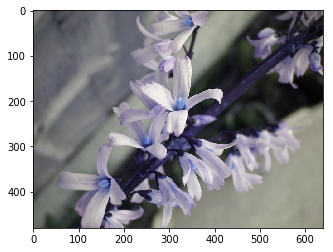

In [24]:
plt.imshow(dst)

In [25]:
def xyz2rgb(xyz):
    assert len(xyz.shape) > 2
    xyz_gpu = cp.array(xyz.astype(np.int32))
    X_gpu = xyz_gpu[:,:,0]
    Y_gpu = xyz_gpu[:,:,1]
    Z_gpu = xyz_gpu[:,:,2]
    R_gpu = (X_gpu * 55460 - Y_gpu * 213955 + Z_gpu * 1207070) >> 20  
    G_gpu = (X_gpu * -965985 + Y_gpu * 1967119 + Z_gpu * 47442) >> 20            # x * -965985 和 -x * 965985 在反汇编后是不一样的，后者多了个neg指令  
    B_gpu = (X_gpu * 3229543 - Y_gpu * 1611819 - Z_gpu * 569148) >> 20  
    
    dst_gpu = cp.zeros_like(xyz_gpu)
    dst_gpu[:,:,0] = R_gpu
    dst_gpu[:,:,1] = G_gpu
    dst_gpu[:,:,2] = B_gpu
    
    dst = dst_gpu.get()
    dst = np.clip(dst,0,255)
    dst = np.uint8(dst)
    return dst

In [26]:
dst = xyz2rgb(dst)

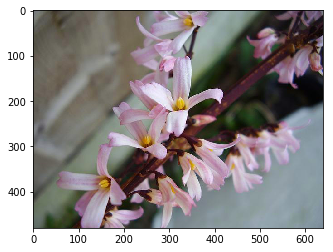

In [27]:
plt.imshow(dst)